**Linear Regression**

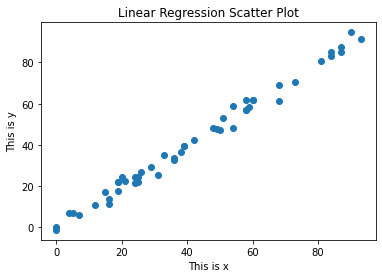

 Correlation coefficient is  0.9949530662153313


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import csv
x = []
y = []
with open(r"C:\Users\hp\Documents\Book1.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        x.append(float(row[0]))
        y.append(float(row[1]))
plt.scatter(x,y)

plt.xlabel("This is x")
plt.ylabel("This is y")

plt.title("Linear Regression Scatter Plot")
plt.show()

# correlation coefficient
def find_corr_x_y(x,y):
    n = len(x)
    # find the sum of products
    prod = []
    for xi , yi in zip(x,y):
        prod.append(xi*yi)
        
    sum_prod_x_y = sum(prod)
    sum_x = sum(x)
    sum_y = sum(y)
    squared_sum_x = sum_x**2
    squared_sum_y = sum_y**2
    x_square =[]
        
    for xi in x:
        x_square.append(xi**2)
    # find the sum
    x_square_sum = sum(x_square)
    y_square = []
         
    for yi in y:
            y_square.append(yi**2)
            
        # find the sum
    y_square_sum = sum(y_square)
            
        # use formula to calculate correlation
    numerator = n*sum_prod_x_y - sum_x*sum_y
    denominator_term1 = n*x_square_sum - squared_sum_x
    denominator_term2 = n*y_square_sum - squared_sum_y
    denominator = (denominator_term1*denominator_term2)**0.5
    correlation = numerator/denominator
            
    return correlation
print( " Correlation coefficient is ",find_corr_x_y(x,y))


**So here the value of correlation coefficient is positive and in between -1.0 to +1.0 which shows that there is a linear
relationship between x and y**

In [7]:
# calculate coefficient of beta_0 and beta_1
num = 0
den = 0
m_x = np.mean(x)
m_y = np.mean(y)
for i in range(len(x)):
    num = num + (x[i] - m_x )*(y[i] - m_y)
    den = den + (x[i] - m_x)**2
beta_1 = num/den
beta_0 = m_y - beta_1*m_x
print(beta_1)
print(beta_0)

0.995570356119447
-0.03728651428244234


In [8]:
# now predicted values of y
beta_1 = 0.995570356119447
beta_0 = -0.03728651428244234
Y_pred = []
for i in range(len(x)):
    Y_pred.append(beta_1 * x[i] + beta_0)
print(Y_pred)

[23.856402032584285, 49.74123129168991, 14.896268827509262, 37.79438701825654, 86.57733446810944, 35.80324630601765, 11.909557759150921, 80.60391233139276, 24.851972388703732, 4.940565266314793, 15.89183918362871, 15.89183918362871, 23.856402032584285, 38.78995737437599, 53.7235127161677, 59.696934852884375, 25.84754274482318, 72.63934948243718, 28.83425381318152, 30.825394525420414, 67.66149770183995, 86.57733446810944, 57.70579414064548, 53.7235127161677, 83.59062339975111, 57.70579414064548, 48.74566093557046, 19.874120608106498, 89.56404553646779, 47.75009057945101, 3.9449949101953456, 24.851972388703732, 41.776668442734334, -0.03728651428244234, 59.696934852884375, 92.55075660482613, 38.78995737437599, 6.931705978553687, 20.869690964225946, 67.66149770183995, 83.59062339975111, -0.03728651428244234, 57.70579414064548, 18.87855025198705, 35.80324630601765, 18.87855025198705, 58.70136449676493, 50.73680164780936, 18.87855025198705, 32.81653523765931]


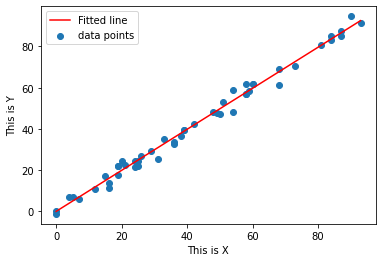

In [5]:
# now fit the model
plt.scatter(x , y  , label = "data points")
plt.plot([min(x) , max(x)] , [min(Y_pred) , max(Y_pred)] , color = "red" , label = "Fitted line")
plt.xlabel("This is X")
plt.ylabel("This is Y")
plt.legend()
plt.show()

In [24]:
# finding residual
def r_square(x,y):
    m_y = np.mean(y)
    n = len(y)
    Y = np.array(y)
    error = Y - Y_pred
    SS_res = np.sum(error**2)
    print("SS residual is ",SS_res)
    SS_total = np.sum((Y - m_y)**2)
    R_square = 1-(se/sst)
    print("R_square is ", R_square)
print(r_square(x,y))

SS residual is  338.28735561201614
R_square is  0.9899316039712872
None


**so the value of r square tells us how well the model fits the data and ranmge is between 0<= r_square <=1
"Higher the value of R_square , the better the model will be"**

In [53]:
# Anova table

# Degree of freedom
DF_REG = 1
DF_RES = len(x) - 2 
DF_TOT = len(x) - 1

# Sum of square
m_y = np.mean(y)
n = len(y)
Y = np.array(y)
error = Y - Y_pred

# SS Residual 
SS_res = np.sum(error**2)

# SS Regression

SS_Reg = np.sum((Y_pred - m_y)**2)

# SS Total
SS_total = np.sum((Y - m_y)**2)

# MS Residual

MS_Res = SS_res/DF_RES

# MS Regression

MS_Reg = SS_Reg/DF_REG

# F Statistics

F = MS_Reg/MS_Res

# Printing Anova table
print('{0}\t\t{1}\t\t{2}\t\t\t{3}\t\t\t{4}'.format( "Sources","DF  " , "SS" , "MS" , "F statistics"))
print('{0}\t{1}\t{2}\t{3}\t\t{4}'.format( "Regression" ,DF_REG , SS_Reg , MS_Reg , F))
print('{0}\t{1}\t{2}\t{3}'.format("Residual",DF_RES , SS_res , MS_Res))
print('{0}\t\t{1}\t{2}'.format("Total",  DF_TOT , SS_total ))



    

Sources		DF  		SS			MS			F statistics
Regression	1	33260.64485238798	33260.64485238798		4719.392925657178
Residual	48	338.28735561201614	7.047653241917003
Total		49	33598.932208
